# Identificação de pragas em colheitas

1 - Importação das bibliotecas:

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

2 - Definição dos parâmetros dos Datasets e leitura dos arquivos:

In [141]:
# Nome dos arquivos que serão lidos
amargoso = 'data/_amargoso.csv'
braquiaria = 'data/_braquiaria.csv'
caruru = 'data/_caruru.csv'
juazeiro = 'data/_juazeiro.csv'
leiteiro = 'data/_leiteiro.csv'

# Criação dos Dataframes
df_amargoso = pd.read_csv(amargoso, sep=',')
df_braquiaria = pd.read_csv(braquiaria, sep=',')
df_caruru = pd.read_csv(caruru, sep=',')
df_juazeiro = pd.read_csv(juazeiro, sep=',')
df_leiteiro = pd.read_csv(leiteiro, sep=',')

# Renomear as colunas dos Dataframes:
vec_dfs = [df_amargoso, df_braquiaria, df_caruru, df_juazeiro, df_leiteiro]

for df in vec_dfs:
    df.rename(columns={'Sample num' : 'id', 'F1 (410nm)' : 'f1', 'F2 (440nm)' : 'f2', 
                       'F3 (470nm)' : 'f3', 'F4 (510nm)' : 'f4', 'F5 (550nm)' : 'f5', 
                       'F6 (583nm)' : 'f6', 'F7 (620nm)' : 'f7', 'F8 (670nm)' : 'f8', 
                       'CLEAR' : 'clear', 'SAIDA' : 'y'}, inplace = True)
    df.drop('Function', axis=1, inplace=True)

In [142]:
# Tipos de pragas
# - 0 = Amargoso
# - 1 = Caruru
# - 2 = Juazeiro
# - 3 = Leiteiro
# - 4 = Sem praga

df_amargoso['tipo'] = '0'
df_caruru['tipo'] = '1'
df_juazeiro['tipo'] = '2'
df_leiteiro['tipo'] = '3'
df_braquiaria['tipo'] = '4'

3 - Pré-processamento dos dados

In [143]:
# Converter dados de Inteiro e Object para Float
def converter_colunas_float(df):
    df['f1'] = df.f1.astype(np.float64)
    df['f2'] = df.f2.astype(np.float64)
    df['f3'] = df.f3.astype(np.float64)
    df['f4'] = df.f4.astype(np.float64)
    df['f5'] = df.f5.astype(np.float64)
    df['f6'] = df.f6.astype(np.float64)
    df['f7'] = df.f7.astype(np.float64)
    df['f8'] = df.f8.astype(np.float64)
    df['clear'] = pd.to_numeric(df['clear'],errors='coerce')
    df['y'] = df.y.astype(np.float64)
    df['tipo'] = df.tipo.astype(np.float64)
    
    return df

# Dados Faltantes
# - Verificação da existência de dados faltantes
# - - Substituição de dados faltantes pelo o valor obtido com interpolação linear

def inserir_dados_faltantes(df):
    if df['f1'].isna().any():
        df['f1'] = df.f1.interpolate(method='linear')
    if df['f2'].isna().any():
        df['f2'] = df.f2.interpolate(method='linear')
    if df['f3'].isna().any():
        df['f3'] = df.f3.interpolate(method='linear')
    if df['f4'].isna().any():
        df['f4'] = df.f4.interpolate(method='linear')
    if df['f5'].isna().any():
        df['f5'] = df.f5.interpolate(method='linear')
    if df['f6'].isna().any():
        df['f6'] = df.f6.interpolate(method='linear')
    if df['f7'].isna().any():
        df['f7'] = df.f7.interpolate(method='linear')
    if df['f8'].isna().any():
        df['f8'] = df.f8.interpolate(method='linear')
    if df['clear'].isna().any():
        df['clear'] = df.clear.interpolate(method='linear')
    
    return df

#-------------------------------------------------------------------------

# Vetor de Dataframes
vec_dfs = [df_amargoso, df_braquiaria, df_caruru, df_juazeiro, df_leiteiro]

vec_df_preprocessados = []

for df in vec_dfs:
    
    # Converter os dados para float
    df = converter_colunas_float(df)

    # Inserir os dados faltantes via interpolação linear
    df = inserir_dados_faltantes(df)
    
    # Inserir os Dataframes Pré-processados em um vetor
    vec_df_preprocessados.append(df)

# Concatenar todos os Dataframes
df_preprocessado = pd.concat(vec_df_preprocessados)

# Resetar o index do Dataframe
df_preprocessado = df_preprocessado.reset_index()

# Seleção dos parâmetros mais interessantes
df_preprocessado = df_preprocessado[['f1','f2','f3','f4','f5','f6','f7','f8','clear','y','tipo']]

# Salvar o DataFrame Pré-processado
df_preprocessado.to_csv('df_preprocessado.csv')

In [144]:
# - Informações relevantes sobre os dados pré-processados
print('-------Total de Linhas do Dataframe Pré-processado-------')
print(len(df_preprocessado))
print('-------Pré-visualização dos dados do Dataframe-------')
print(df_preprocessado.head())
print('-------Descrição dos tipos das variáveis contidas no Dataframe-------')
print(df_preprocessado.dtypes)
print('-------Descrição do Dataframe-------')
print(df_preprocessado.describe())

-------Total de Linhas do Dataframe Pré-processado-------
637
-------Pré-visualização dos dados do Dataframe-------
      f1     f2     f3     f4     f5     f6      f7      f8   clear    y  tipo
0  366.0  471.0  632.0  796.0  999.0  967.0  1326.0  1532.0  7318.0  1.0   0.0
1  336.0  459.0  595.0  811.0  987.0  953.0  1356.0  1478.0  7284.0  1.0   0.0
2  333.0  470.0  610.0  849.0  992.0  958.0  1472.0  1487.0  7427.0  1.0   0.0
3  337.0  453.0  589.0  774.0  933.0  949.0  1316.0  1406.0  6916.0  1.0   0.0
4  329.0  454.0  585.0  783.0  948.0  951.0  1311.0  1490.0  6953.0  1.0   0.0
-------Descrição dos tipos das variáveis contidas no Dataframe-------
f1       float64
f2       float64
f3       float64
f4       float64
f5       float64
f6       float64
f7       float64
f8       float64
clear    float64
y        float64
tipo     float64
dtype: object
-------Descrição do Dataframe-------
               f1          f2          f3           f4           f5  \
count  637.000000  637.000000  

4 - Análise de dados

In [145]:
# Correlação entre os dados
# - Fazer a correlação de Pearson para verificar a se há correlação entre os dados.
# - - - - - - - - - - Níveis de Correlação - - - - - - - - -
# - - 0.9 para mais ou para menos indica uma correlação muito forte.
# - - 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
# - - 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
# - - 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
# - - 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

# Realizar a correlação entre as colunas
df_correlacao  = df_preprocessado.corr()

HeatMap

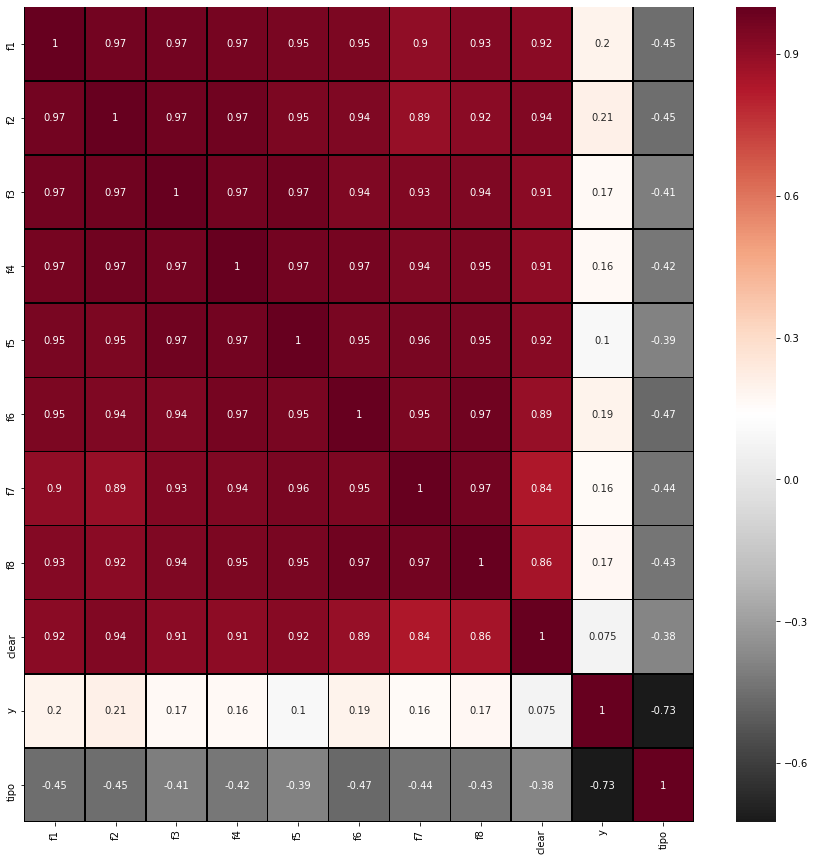

In [146]:
# Visualização das correlações entre das labels do Dataframe através de um heatmap:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(df_correlacao, annot=True, linewidths=0.5, linecolor='black', cmap='RdGy_r')
plt.xticks(rotation=90)
plt.savefig("heatmap_correlation.png", dpi=150) 
plt.show()

Conclusão: As features de "f1" até "clear" possuem uma correlação forte, logo isso é um bom indício que essas features são representativas, no entanto, como na base de dados possui poucos exemplos balanceados, ou seja há aproximadamente 120 casos do tipo braquiaria e mais de 500 casos de exemplos de dados com praga, logo isso impacta na correlação das features com as saídas.

PCA (Primary Component Analysis)

In [147]:
# Análise dos componentes principais e descoberta das 3 features que mais impactam o modelo

4 - Criação do conjunto verdade 

4.1 - Solução para a identificação de pragas

In [148]:
# Resetar o index do Dataframe
df_preprocessado = df_preprocessado.reset_index()

4.1.1 Criação do conjunto de teste

In [149]:
# Selecionar as features necessárias
df_preprocessado_conj_vdd = df_preprocessado[['index','f1','f2','f3','f4','f5','f6','f7','f8','clear','y']]

# vetor de bases com y = 0 e y = 1
vec_conjunto_vdd = []

# Dados do Dataframe que a label "y" é 0
df_process_y0 = df_preprocessado_conj_vdd[df_preprocessado_conj_vdd['y'] == 0.0]

df_process_y0 = df_process_y0.sample(n = 13, random_state=1)

vec_conjunto_vdd.append(df_process_y0)

# Dados do Dataframe que a label "y" é 1
df_process_y1 = df_preprocessado_conj_vdd[df_preprocessado_conj_vdd['y'] == 1.0]

df_process_y1 = df_process_y1.sample(n = 13, random_state=1)

# vetor com o conjunto verdade balanceado
vec_conjunto_vdd.append(df_process_y1)

# Planejamento do conjunto de treinamento
# - 10% da base com menor frequência
# - Base com menor frequência = 128
# - Conjunto verdade = 13*2

vec_df_vdd = pd.concat(vec_conjunto_vdd)

print(vec_df_vdd)

vec_df_vdd.to_csv('conj_vdd_teste_identificacao_praga.csv')

     index     f1     f2     f3      f4      f5      f6      f7      f8  \
246    246  279.0  354.0  480.0   567.0   764.0   706.0   876.0   974.0   
229    229  268.0  336.0  446.0   549.0   715.0   700.0   842.0   954.0   
180    180  269.0  382.0  483.0   664.0   774.0   850.0  1083.0  1308.0   
181    181  326.0  423.0  583.0   737.0   929.0  1029.0  1248.0  1512.0   
158    158  244.0  300.0  373.0   511.0   615.0   692.0   734.0   884.0   
243    243  272.0  347.0  471.0   559.0   744.0   701.0   851.0   957.0   
247    247  279.0  357.0  476.0   568.0   751.0   707.0   877.0   986.0   
160    160  262.0  315.0  399.0   547.0   659.0   757.0   837.0   997.0   
156    156  232.0  279.0  355.0   484.0   572.0   631.0   696.0   795.0   
176    176  252.0  316.0  398.0   534.0   665.0   705.0   779.0   930.0   
233    233  263.0  333.0  438.0   541.0   707.0   704.0   813.0   947.0   
228    228  265.0  331.0  441.0   542.0   714.0   699.0   832.0   947.0   
129    129  322.0  447.0 

4.1.2 - Criação do conjunto para treinamento

In [150]:
# Ids do conjunto de teste
ids = vec_df_vdd['index'].values

# Conjunto de treino sem a ocorrência dos exemplos usados no teste
df_conjunto_treino = df_preprocessado[~df_preprocessado['index'].isin(ids)]

# vetor de bases com y = 0 e y = 1
vec_conjunto_treino = []

# Dados do Dataframe que a label "y" é 0
df_process_y0_treino = df_conjunto_treino[df_conjunto_treino['y'] == 0.0]

df_process_y0_treino = df_process_y0_treino.sample(n = 115, random_state=1)

vec_conjunto_treino.append(df_process_y0_treino)

# Dados do Dataframe que a label "y" é 1
df_process_y1_treino = df_conjunto_treino[df_conjunto_treino['y'] == 1.0]

df_process_y1_treino = df_process_y1_treino.sample(n = 115, random_state=1)

vec_conjunto_treino.append(df_process_y1_treino)

# Planejamento do conjunto de treinamento
# - 90% da base com menor frequência
# - Base com menor frequência = 115
# - Conjunto de treino = 115*2

vec_conjunto_treino = pd.concat(vec_conjunto_treino)

print(vec_conjunto_treino)

vec_conjunto_treino.to_csv('conj_vdd_treino_identificacao_praga.csv')

     index     f1     f2     f3     f4      f5      f6      f7      f8  \
226    226  265.0  329.0  438.0  544.0   703.0   706.0   824.0   954.0   
173    173  273.0  333.0  417.0  573.0   698.0   752.0   813.0  1005.0   
188    188  304.0  416.0  497.0  663.0   781.0   819.0   914.0  1145.0   
215    215  272.0  338.0  453.0  568.0   724.0   722.0   859.0   970.0   
201    201  282.0  339.0  453.0  557.0   742.0   753.0   844.0   977.0   
..     ...    ...    ...    ...    ...     ...     ...     ...     ...   
558    558  269.0  345.0  426.0  565.0   682.0   761.0   822.0  1028.0   
371    371  426.0  567.0  761.0  823.0  1009.0  1150.0  1179.0  1528.0   
429    429  314.0  439.0  550.0  706.0   842.0   873.0  1003.0  1236.0   
442    442  347.0  432.0  531.0  702.0   795.0   852.0   884.0  1093.0   
528    528  243.0  302.0  393.0  511.0   630.0   678.0   790.0   937.0   

      clear    y  tipo  
226  5122.0  0.0   4.0  
173  4505.0  0.0   4.0  
188  5634.0  0.0   4.0  
215  5265.0

4.2 - Solução para a identificação de qual tipo de praga

4.2.1 - Criação do conjunto para teste

In [151]:
# Selecionar as features necessárias
df_preprocessado_conj_vdd_praga = df_preprocessado[['index','f1','f2','f3','f4','f5','f6','f7','f8','clear','tipo']]

# vetor de bases com tipo = 0, tipo = 1, tipo = 2, tipo = 3
vec_conjunto_vdd_praga = []

# Dados do Dataframe que a label "tipo" é 0
df_process_tipo0 = df_preprocessado_conj_vdd_praga[df_preprocessado_conj_vdd_praga['tipo'] == 0.0]

df_process_tipo0 = df_process_tipo0.sample(n = 8, random_state=1)

vec_conjunto_vdd_praga.append(df_process_tipo0)

#------------------------------------------

# Dados do Dataframe que a label "tipo" é 1
df_process_tipo1 = df_preprocessado_conj_vdd_praga[df_preprocessado_conj_vdd_praga['tipo'] == 1.0]

df_process_tipo1 = df_process_tipo1.sample(n = 8, random_state=1)

vec_conjunto_vdd_praga.append(df_process_tipo1)

#------------------------------------------

# Dados do Dataframe que a label "tipo" é 2
df_process_tipo2 = df_preprocessado_conj_vdd_praga[df_preprocessado_conj_vdd_praga['tipo'] == 2.0]

df_process_tipo2 = df_process_tipo2.sample(n = 8, random_state=1)

vec_conjunto_vdd_praga.append(df_process_tipo2)

#------------------------------------------

# Dados do Dataframe que a label "tipo" é 3
df_process_tipo3 = df_preprocessado_conj_vdd_praga[df_preprocessado_conj_vdd_praga['tipo'] == 3.0]

# Selecionar uma parcela do dataset randomicamente
df_process_tipo3 = df_process_tipo3.sample(n = 8, random_state=1)

vec_conjunto_vdd_praga.append(df_process_tipo3)

# Planejamento do conjunto de teste
# - 10% da base com menor frequência
# - Base com menor frequência = 72
# - Conjunto de teste = 8*4

vec_conjunto_teste_praga = pd.concat(vec_conjunto_vdd_praga)

print(vec_conjunto_teste_praga)

vec_conjunto_teste_praga.to_csv('conj_vdd_teste_identificacao_tipo_praga.csv')


     index     f1     f2     f3      f4      f5      f6      f7      f8  \
74      74  378.0  480.0  591.0   736.0   931.0  1014.0  1076.0  1303.0   
45      45  349.0  452.0  561.0   718.0   862.0   933.0  1014.0  1339.0   
48      48  334.0  535.0  545.0   870.0   843.0  1138.0  1374.0  1363.0   
31      31  289.0  348.0  446.0   596.0   724.0   862.0  1016.0  1186.0   
65      65  392.0  504.0  652.0   765.0   984.0  1103.0  1105.0  1377.0   
66      66  365.0  482.0  573.0   732.0   870.0  1018.0   976.0  1284.0   
118    118  350.0  468.0  577.0   709.0   841.0   981.0  1021.0  1262.0   
100    100  299.0  425.0  493.0   709.0   788.0   954.0   942.0  1209.0   
272    272  452.0  597.0  820.0   936.0  1180.0  1257.0  1628.0  2043.0   
308    308  430.0  535.0  691.0   952.0  1095.0  1248.0  1579.0  1795.0   
263    263  438.0  580.0  775.0   956.0  1221.0  1266.0  1636.0  2038.0   
321    321  437.0  528.0  691.0   885.0  1044.0  1197.0  1491.0  1786.0   
306    306  407.0  521.0 

Criação do conjunto para treinamento

In [152]:
# Ids do conjunto de teste
ids_praga = vec_conjunto_teste_praga['index'].values

# Conjunto de treino sem a ocorrência dos exemplos usados no teste
df_conjunto_treino_praga = df_preprocessado[~df_preprocessado['index'].isin(ids_praga)]

# vetor de bases com tipo = 0, tipo = 1, tipo = 2, tipo = 3
vec_conjunto_treino_praga = []

# Dados do Dataframe que a label "tipo" é 0
df_process_tipo0_treino = df_conjunto_treino_praga[df_conjunto_treino_praga['tipo'] == 0.0]

# Selecionar uma parcela do dataset randomicamente
df_process_tipo0_treino = df_process_tipo0_treino.sample(n = 64, random_state=1)

vec_conjunto_treino_praga.append(df_process_tipo0_treino)

#--------------------------

# Dados do Dataframe que a label "tipo" é 1
df_process_tipo1_treino = df_conjunto_treino_praga[df_conjunto_treino_praga['tipo'] == 0.0]

# Selecionar uma parcela do dataset randomicamente
df_process_tipo1_treino = df_process_tipo1_treino.sample(n = 64, random_state=1)

vec_conjunto_treino_praga.append(df_process_tipo1_treino)

#--------------------------

# Dados do Dataframe que a label "tipo" é 2
df_process_tipo2_treino = df_conjunto_treino_praga[df_conjunto_treino_praga['tipo'] == 0.0]

# Selecionar uma parcela do dataset randomicamente
df_process_tipo2_treino = df_process_tipo2_treino.sample(n = 64, random_state=1)

vec_conjunto_treino_praga.append(df_process_tipo2_treino)

#--------------------------

# Dados do Dataframe que a label "tipo" é 3
df_process_tipo3_treino = df_conjunto_treino_praga[df_conjunto_treino_praga['tipo'] == 0.0]

# Selecionar uma parcela do dataset randomicamente
df_process_tipo3_treino = df_process_tipo3_treino.sample(n = 64, random_state=1)

vec_conjunto_treino_praga.append(df_process_tipo3_treino)

# Planejamento do conjunto de teste
# - 90% da base com menor frequência
# - Base com menor frequência = 64
# - Conjunto de teste = 64*4

vec_conjunto_treino_praga_ok = pd.concat(vec_conjunto_treino_praga)

print(vec_conjunto_treino_praga_ok)

vec_conjunto_treino_praga_ok.to_csv('conj_vdd_treino_identificacao_tipo_praga.csv')

     index     f1     f2     f3     f4      f5      f6      f7      f8  \
75      75  354.0  473.0  541.0  716.0   878.0   991.0   990.0  1259.0   
49      49  305.0  402.0  475.0  618.0   787.0   863.0   995.0  1118.0   
61      61  363.0  490.0  586.0  791.0   969.0  1270.0  1261.0  1804.0   
122    122  387.0  524.0  658.0  825.0   919.0   877.0  1112.0  1389.0   
79      79  385.0  528.0  621.0  832.0  1063.0  1040.0  1304.0  1514.0   
..     ...    ...    ...    ...    ...     ...     ...     ...     ...   
42      42  340.0  448.0  561.0  754.0   854.0   897.0  1126.0  1295.0   
54      54  293.0  395.0  450.0  586.0   689.0   870.0   883.0  1106.0   
47      47  337.0  443.0  524.0  663.0   784.0   949.0   946.0  1292.0   
123    123  325.0  433.0  558.0  692.0   859.0   834.0  1044.0  1130.0   
55      55  299.0  413.0  499.0  632.0   721.0   854.0   894.0  1154.0   

      clear    y  tipo  
75   8699.0  1.0   0.0  
49   6170.0  1.0   0.0  
61   8317.0  1.0   0.0  
122  7230.0